In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Import NO2 data

In [211]:
data=pd.read_csv('https://raw.githubusercontent.com/yilmazduygu/gretta-grettas/master/ad_viz_plotval_data.csv')
pd.DataFrame.insert(data,0,'datetime',[pd.datetime(int(str(data.iloc[i,0])[6:10]),int(str(data.iloc[i,0])[0:2]),int(str(data.iloc[i,0])[3:5])) for i in data.index])
data.head()


data=pd.DataFrame.drop(data,['Date'],axis=1)

C:\Users\plame\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [212]:
data['Daily Max 1-hour NO2 Concentration'].describe()
data.tail()

,datetime,Source,Site ID,POC,Daily Max 1-hour NO2 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
3203,2019-12-27,AQS,340130003,1,34.2,ppb,32,Newark Firehouse,24,100.0,42602,Nitrogen dioxide (NO2),35620,"New York-Newark-Jersey City, NY-NJ-PA",34,New Jersey,13,Essex,40.720989,-74.192892
3204,2019-12-28,AQS,340130003,1,33.9,ppb,31,Newark Firehouse,24,100.0,42602,Nitrogen dioxide (NO2),35620,"New York-Newark-Jersey City, NY-NJ-PA",34,New Jersey,13,Essex,40.720989,-74.192892
3205,2019-12-29,AQS,340130003,1,34.9,ppb,32,Newark Firehouse,21,88.0,42602,Nitrogen dioxide (NO2),35620,"New York-Newark-Jersey City, NY-NJ-PA",34,New Jersey,13,Essex,40.720989,-74.192892
3206,2019-12-30,AQS,340130003,1,23.7,ppb,22,Newark Firehouse,24,100.0,42602,Nitrogen dioxide (NO2),35620,"New York-Newark-Jersey City, NY-NJ-PA",34,New Jersey,13,Essex,40.720989,-74.192892
3207,2019-12-31,AQS,340130003,1,25.5,ppb,24,Newark Firehouse,24,100.0,42602,Nitrogen dioxide (NO2),35620,"New York-Newark-Jersey City, NY-NJ-PA",34,New Jersey,13,Essex,40.720989,-74.192892


Text(0.5, 1.0, 'Newark Fire Station NO2 concentration')

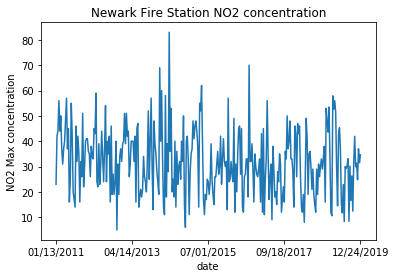

In [4]:
plt.plot(data['Date'][::10],data['Daily Max 1-hour NO2 Concentration'][::10])
plt.xticks(data['Date'][0::800]);
plt.xlabel('date')
plt.ylabel('NO2 Max concentration');
plt.title('Newark Fire Station NO2 concentration')

## Plot Autocorrelation Functions

In [5]:
def make_lag_df(df,feature,lag):
    lag_df = df.copy()
    lag_df[feature + '_lag'] = np.nan
    
    lag_df.loc[lag:,feature + '_lag'] = lag_df.loc[0:len(lag_df)-(lag+1),feature].values
    return lag_df

def plot_lag(df,feature,lag,ax=None):
    df = make_lag_df(df,feature,lag).dropna()
    if ax:
        ax.scatter(df[feature+'_lag'],df[feature])

        ax.plot(np.linspace(350,550,10),
                np.linspace(350,550,10),
               'k--', alpha = .6)

        ax.set_title("lag = " + str(lag),fontsize=12)
    else:
        plt.scatter(df[feature+'_lag'],df[feature])

        plt.plot(np.linspace(350,550,10),
                np.linspace(350,550,10),
               'k--', alpha = .6)

        plt.show()

def get_autocorr(df,feature,lag):
    df = make_lag_df(df,feature,lag)
    mean_y = df[feature].mean()
    
    
    
    y_ts = df[feature].values
    y_lags = df.dropna()[feature + '_lag'].values
    
    numerator = np.sum((y_ts[lag:] - mean_y)*(y_lags - mean_y))
    denom = np.sum(np.power(y_ts - mean_y,2))
    
    return numerator/denom

In [6]:
data_train= data.iloc[:-365,].copy()
data_test = data.drop(data_train.index).copy()

In [7]:
lags = np.arange(0,10,1)
print([get_autocorr(data_train,'Daily Max 1-hour NO2 Concentration',lag) for lag in lags])

[1.0, 0.40528052087480937, 0.15045939608783487, 0.13935415094417136, 0.17125724542873005, 0.15690986866737286, 0.19811621215910802, 0.20610313718593262, 0.17867050108863525, 0.14714844395360008]


In [8]:
data_diff=pd.DataFrame(data_train['Daily Max 1-hour NO2 Concentration'].diff()).dropna().reset_index(drop=True)

In [9]:
data_diff=pd.DataFrame(data_train['Daily Max 1-hour NO2 Concentration'].diff()).dropna().reset_index(drop=True)

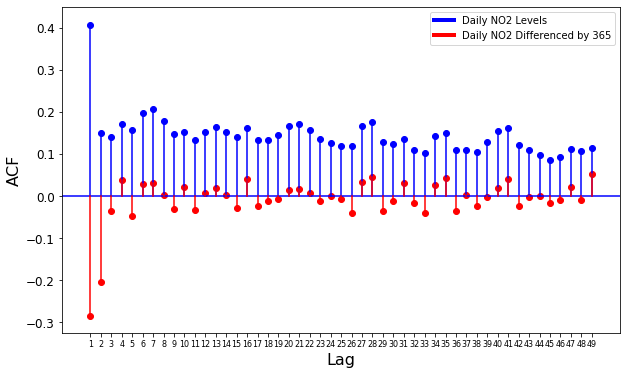

In [10]:
## Plotting block
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color="blue", lw=4),
                Line2D([0], [0], color="red", lw=4)]


n=50

data_autos = []

# get the autocorr.
for i in range(1,n,1):
    data_autos.append(get_autocorr(data_train,'Daily Max 1-hour NO2 Concentration',i))

# make a figure
plt.figure(figsize=(10,6))

# plot a horizontal line
plt.axhline(y=0, xmin=0, xmax=n, color = "blue")

# plot each autocorrelation against the lag
plt.scatter(range(1,n,1), 
           data_autos,
           c='b')

# Plot vertical lines
for i in range(1,n,1):
    plt.plot(i*np.ones(2),[0,data_autos[i-1]],'b')

# Add labels
plt.xlabel("Lag", fontsize=16)
plt.ylabel("ACF", fontsize=16)

# set tick marks
plt.xticks(np.arange(1,n,1), fontsize=8)
plt.yticks(fontsize=12)


data_diff_autos = []

# get the autocorr for the diff data

for i in range(1,n,1):
    data_diff_autos.append(get_autocorr(data_diff,'Daily Max 1-hour NO2 Concentration',i))

# plot each autocorrelation against the lag
plt.scatter(range(1,n,1), 
           data_diff_autos,
           c='r')

# Plot vertical lines
for i in range(1,n,1):
    plt.plot(i*np.ones(2),[0,data_diff_autos[i-1]],'r')
    
plt.legend(custom_lines, ['Daily NO2 Levels', 'Daily NO2 Differenced by 365'])

plt.show()

## Plot Seasonal Projections

In [11]:
from statsmodels.tsa.api import ExponentialSmoothing

In [12]:
add_mod = ExponentialSmoothing(data_train['Daily Max 1-hour NO2 Concentration'],seasonal_periods=365, seasonal='add')

mul_mod = ExponentialSmoothing(data_train['Daily Max 1-hour NO2 Concentration'],seasonal_periods=365, seasonal='mul')

In [13]:
add_mod_fit = add_mod.fit()

# The multiplicative model
mul_mod_fit = mul_mod.fit()

C:\Users\plame\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\plame\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\plame\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\plame\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


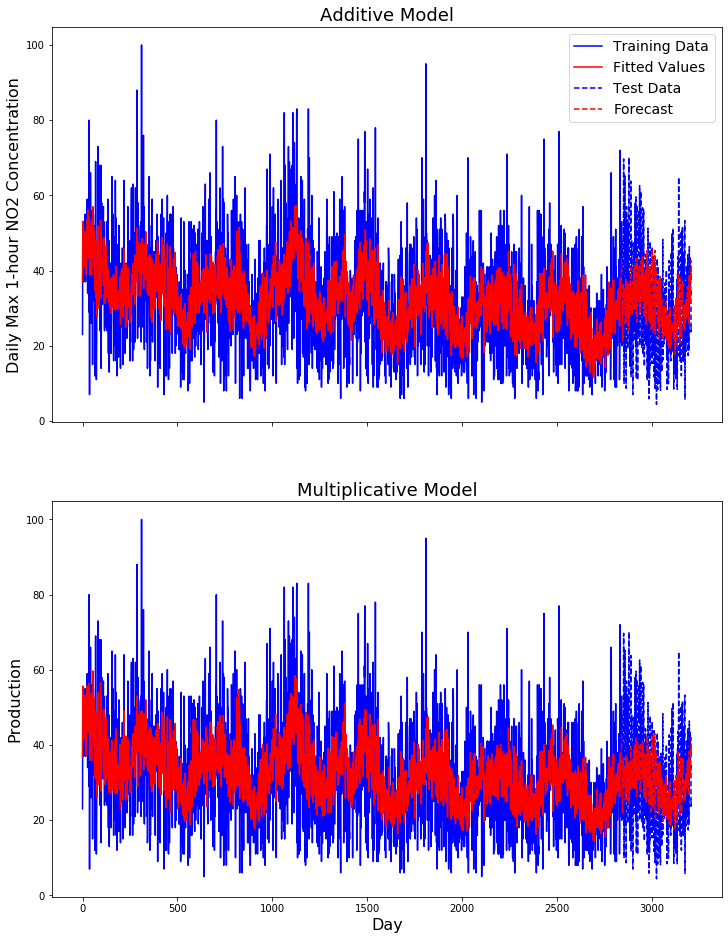

In [14]:
## Plot Them
fig,ax = plt.subplots(2,1,figsize=(12,16),sharex=True, sharey=True)

## The additive model
# training data
ax[0].plot(data_train['Daily Max 1-hour NO2 Concentration'].index, data_train['Daily Max 1-hour NO2 Concentration'].values, 
           'b-', label="Training Data")

# fitted values
ax[0].plot(data_train['Daily Max 1-hour NO2 Concentration'].index, add_mod_fit.fittedvalues, 
           'r-', label="Fitted Values")

# The test data
ax[0].plot(data_test['Daily Max 1-hour NO2 Concentration'].index, data_test['Daily Max 1-hour NO2 Concentration'].values,
            'b--', label="Test Data")
ax[0].plot(data_test['Daily Max 1-hour NO2 Concentration'].index, add_mod_fit.forecast(len(data_test['Daily Max 1-hour NO2 Concentration'])),
           'r--', label="Forecast")

ax[0].legend(fontsize=14)

ax[0].set_title("Additive Model",fontsize=18)
ax[0].set_ylabel('Daily Max 1-hour NO2 Concentration',fontsize=16)



## The multiplicative model
# training data
ax[1].plot(data_train['Daily Max 1-hour NO2 Concentration'].index, data_train['Daily Max 1-hour NO2 Concentration'].values, 
           'b-', label="Training Data")

# fitted values
ax[1].plot(data_train['Daily Max 1-hour NO2 Concentration'].index, mul_mod_fit.fittedvalues, 
           'r-', label="Fitted Values")

# The test data
ax[1].plot(data_test['Daily Max 1-hour NO2 Concentration'].index, data_test['Daily Max 1-hour NO2 Concentration'].values,
            'b--', label="Test Data")
ax[1].plot(data_test['Daily Max 1-hour NO2 Concentration'].index, mul_mod_fit.forecast(len(data_test['Daily Max 1-hour NO2 Concentration'])),
           'r--', label="Forecast")


ax[1].set_title("Multiplicative Model",fontsize=18)
ax[1].set_ylabel("Production",fontsize=16)
ax[1].set_xlabel("Day",fontsize=16)

plt.show()

In [213]:
data_NO2=data

## Ozone Data

In [214]:
weather=pd.read_csv('https://raw.githubusercontent.com/yilmazduygu/gretta-grettas/master/noaa_newark_data.csv')
pd.DataFrame.insert(weather,1, 'datetime',[pd.datetime(weather.iloc[i,1],weather.iloc[i,2],weather.iloc[i,3]) for i in weather.index])
weather=pd.DataFrame.drop(weather,['year','mo','da','Unnamed: 0'],axis=1)

weather.loc[40:45]


C:\Users\plame\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


,datetime,temp,dewp,visib,wdsp,prcp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud
40,2009-05-25,73.1,54.1,9.1,7.2,0.03,0,1,0,0,1,0
41,2009-06-01,62.8,31.2,10.0,10.3,0.00,0,0,0,0,0,0
42,2009-06-04,59.6,51.8,8.2,5.5,1.00,0,1,0,0,0,0
43,2009-06-09,65.6,59.3,7.1,5.3,0.46,0,1,0,0,1,0
44,2009-06-30,75.3,58.4,9.2,6.3,0.00,0,1,0,0,1,0
45,2009-08-05,80.2,67.5,7.9,6.8,0.00,0,0,0,0,0,0


In [218]:
data=pd.read_csv('https://raw.githubusercontent.com/yilmazduygu/gretta-grettas/master/ad_viz_plotval_data_ozone.csv')
#data.insert(6,'Daily Max 1-hour NO2 Concentration',data_NO2)
pd.DataFrame.insert(data,0,'datetime',[pd.datetime(int(str(data.iloc[i,0])[6:10]),int(str(data.iloc[i,0])[0:2]),int(str(data.iloc[i,0])[3:5])) for i in data.index])
data.head()


data=pd.DataFrame.drop(data,['Date'],axis=1)


merge=pd.merge(weather,data, how='inner', left_index=True, right_index=True)
merge=pd.merge(merge,data_NO2, how='inner', left_index=True, right_index=True)

C:\Users\plame\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


3208

Text(0.5, 1.0, 'Newark Fire Station ozone concentration')

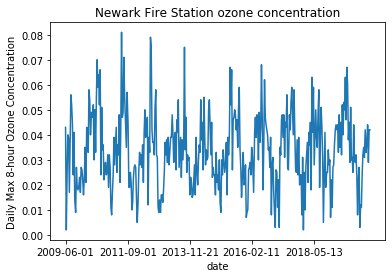

In [165]:
plt.plot(data['datetime'][::10],data['Daily Max 8-hour Ozone Concentration'][::10])
plt.xticks(data['datetime'][0::800]);
plt.xlabel('date')
plt.ylabel('Daily Max 8-hour Ozone Concentration');
plt.title('Newark Fire Station ozone concentration')

[1.0, 0.6472483291920458, 0.47967689555192633, 0.44140848099259256, 0.4134668121850923, 0.4114198244714048, 0.4167957031239155, 0.41163814328955206, 0.4221074177062128, 0.42814951814758656]


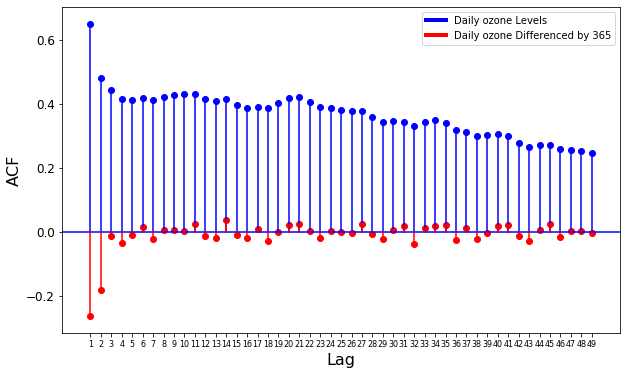

In [166]:
data_train= data.iloc[:-365,].copy()
data_test = data.drop(data_train.index).copy()

lags = np.arange(0,10,1)
print([get_autocorr(data_train,'Daily Max 8-hour Ozone Concentration',lag) for lag in lags])

data_diff=pd.DataFrame(data_train['Daily Max 8-hour Ozone Concentration'].diff()).dropna().reset_index(drop=True)

data_diff=pd.DataFrame(data_train['Daily Max 8-hour Ozone Concentration'].diff()).dropna().reset_index(drop=True)

## Plotting block
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color="blue", lw=4),
                Line2D([0], [0], color="red", lw=4)]


n=50

data_autos = []

# get the autocorr.
for i in range(1,n,1):
    data_autos.append(get_autocorr(data_train,'Daily Max 8-hour Ozone Concentration',i))

# make a figure
plt.figure(figsize=(10,6))

# plot a horizontal line
plt.axhline(y=0, xmin=0, xmax=n, color = "blue")

# plot each autocorrelation against the lag
plt.scatter(range(1,n,1), 
           data_autos,
           c='b')

# Plot vertical lines
for i in range(1,n,1):
    plt.plot(i*np.ones(2),[0,data_autos[i-1]],'b')

# Add labels
plt.xlabel("Lag", fontsize=16)
plt.ylabel("ACF", fontsize=16)

# set tick marks
plt.xticks(np.arange(1,n,1), fontsize=8)
plt.yticks(fontsize=12)


data_diff_autos = []

# get the autocorr for the diff data

for i in range(1,n,1):
    data_diff_autos.append(get_autocorr(data_diff,'Daily Max 8-hour Ozone Concentration',i))

# plot each autocorrelation against the lag
plt.scatter(range(1,n,1), 
           data_diff_autos,
           c='r')

# Plot vertical lines
for i in range(1,n,1):
    plt.plot(i*np.ones(2),[0,data_diff_autos[i-1]],'r')
    
plt.legend(custom_lines, ['Daily ozone Levels', 'Daily ozone Differenced by 365'])

plt.show()

In [84]:
add_mod = ExponentialSmoothing(data_train['Daily Max 8-hour Ozone Concentration'],seasonal_periods=365, seasonal='add')

#mul_mod = ExponentialSmoothing(data_train['Daily Max 8-hour Ozone Concentration'],seasonal_periods=365, seasonal='mul')

In [85]:
add_mod_fit = add_mod.fit()

# The multiplicative model
#mul_mod_fit = mul_mod.fit()

C:\Users\plame\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\plame\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\plame\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


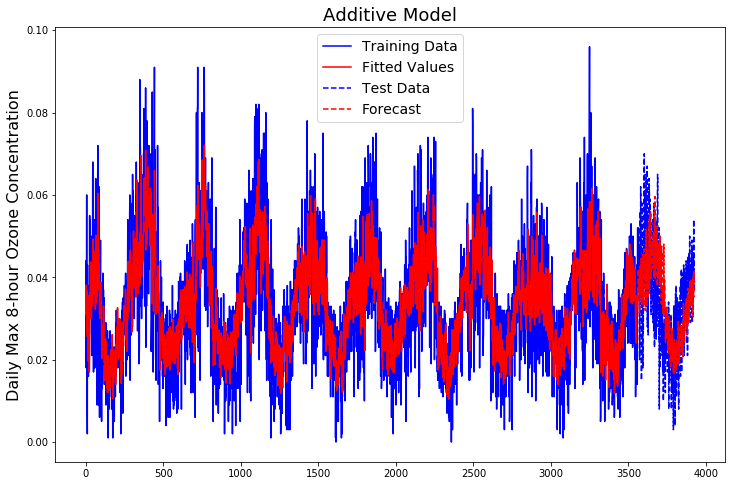

In [86]:
## Plot Them
fig,ax = plt.subplots(1,1,figsize=(12,8),sharex=True, sharey=True)

## The additive model
# training data
ax.plot(data_train['Daily Max 8-hour Ozone Concentration'].index, data_train['Daily Max 8-hour Ozone Concentration'].values, 
        'b-', label="Training Data")

# ted values
ax.plot(data_train['Daily Max 8-hour Ozone Concentration'].index, add_mod_fit.fittedvalues, 
        'r-', label="Fitted Values")

#  test data
ax.plot(data_test['Daily Max 8-hour Ozone Concentration'].index, data_test['Daily Max 8-hour Ozone Concentration'].values,
         'b--', label="Test Data")
ax.plot(data_test['Daily Max 8-hour Ozone Concentration'].index, add_mod_fit.forecast(len(data_test['Daily Max 8-hour Ozone Concentration'])),
        'r--', label="Forecast")

ax.legend(fontsize=14)

ax.set_title("Additive Model",fontsize=18)
ax.set_ylabel('Daily Max 8-hour Ozone Concentration',fontsize=16)



## The multiplicative model
# # training data
# ax[1].plot(data_train['Daily Max 8-hour Ozone Concentration'].index, data_train['Daily Max 8-hour Ozone Concentration'].values, 
#            'b-', label="Training Data")

# # fitted values
# ax[1].plot(data_train['Daily Max 8-hour Ozone Concentration'].index, mul_mod_fit.fittedvalues, 
#            'r-', label="Fitted Values")

# # The test data
# ax[1].plot(data_test['Daily Max 8-hour Ozone Concentration'].index, data_test['Daily Max 8-hour Ozone Concentration'].values,
#             'b--', label="Test Data")
# ax[1].plot(data_test['Daily Max 8-hour Ozone Concentration'].index, mul_mod_fit.forecast(len(data_test['Daily Max 8-hour Ozone Concentration'])),
#            'r--', label="Forecast")


# ax[1].set_title("Multiplicative Model",fontsize=18)
# ax[1].set_ylabel("Production",fontsize=16)
# ax[1].set_xlabel("Day",fontsize=16)

plt.show()

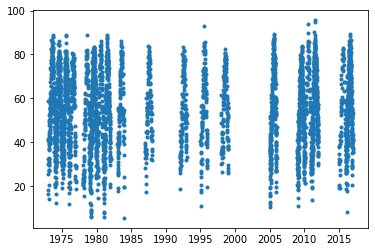

In [190]:
plt.plot(merge['datetime_x'][0:4000],merge['temp'][0:4000],'.')

C:\Users\plame\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\plame\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\plame\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Text(0, 0.5, 'temp')

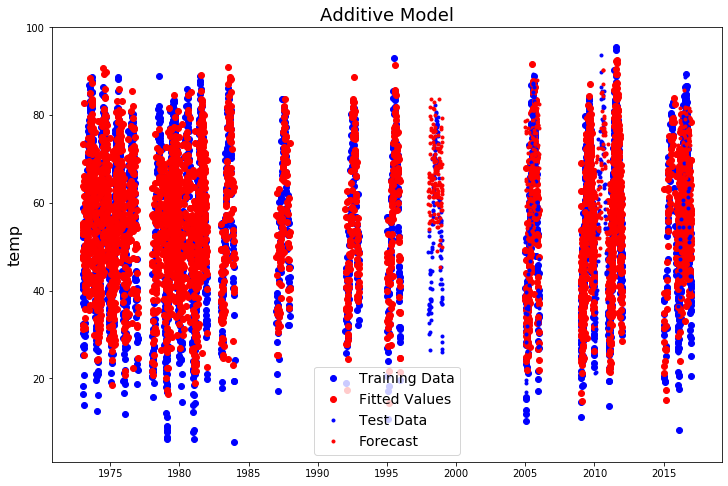

In [206]:
merge_train= merge.iloc[:-365,].copy()
merge_test = merge.drop(merge_train.index).copy()

add_mod = ExponentialSmoothing(merge_train['temp'],seasonal_periods=365, seasonal='add')
add_mod_fit = add_mod.fit()


fig,ax = plt.subplots(1,1,figsize=(12,8),sharex=True, sharey=True)

## The additive model
# training data
ax.plot(merge_train['datetime_x'], merge_train['temp'].values, 
        'bo', label="Training Data")

# ted values
ax.plot(merge_train['datetime_x'], add_mod_fit.fittedvalues, 
        'ro', label="Fitted Values")

#  test data
ax.plot(merge_test['datetime_x'], merge_test['temp'].values,
         'b.', label="Test Data")
#

ax.plot(merge_test['datetime_x'], add_mod_fit.forecast(len(merge_test['temp'])),
        'r.', label="Forecast")

ax.legend(fontsize=14)

ax.set_title("Additive Model",fontsize=18)
ax.set_ylabel('temp',fontsize=16)


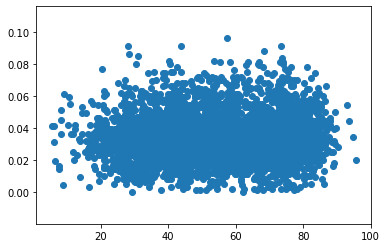

In [210]:
plt.scatter(merge['temp'],merge['Daily Max 8-hour Ozone Concentration'])

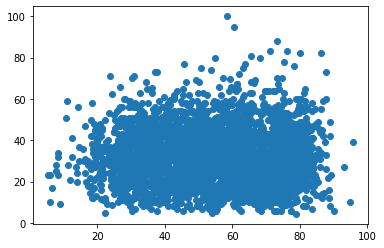

In [219]:
plt.scatter(merge['temp'],merge['Daily Max 1-hour NO2 Concentration'])

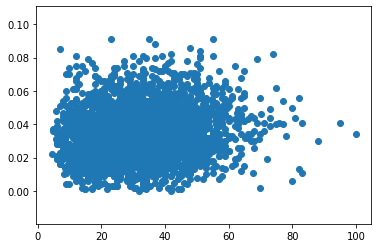

In [220]:
plt.scatter(merge['Daily Max 1-hour NO2 Concentration'],merge['Daily Max 8-hour Ozone Concentration'])

# Data by County

In [145]:
county=pd.read_csv('https://raw.githubusercontent.com/yilmazduygu/gretta-grettas/master/annual_aqi_by_county_2020.csv')
county=pd.DataFrame.append(county,pd.read_csv('https://raw.githubusercontent.com/yilmazduygu/gretta-grettas/master/annual_aqi_by_county_2019.csv'))
county.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,Alabama,Baldwin,2020,11,11,0,0,0,0,0,48,39,20,0,0,0,0,11,0
1,Alabama,Clay,2020,5,5,0,0,0,0,0,31,31,15,0,0,0,0,5,0
2,Alabama,DeKalb,2020,59,59,0,0,0,0,0,45,40,32,0,0,58,0,1,0
3,Alabama,Etowah,2020,8,8,0,0,0,0,0,40,40,28,0,0,0,0,8,0
4,Alabama,Jefferson,2020,32,26,6,0,0,0,0,63,54,35,1,5,9,0,15,2


In [146]:
county=pd.read_csv('https://raw.githubusercontent.com/yilmazduygu/gretta-grettas/master/annual_conc_by_monitor_2020.csv')

In [147]:
county.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,9.2,4.8,3.2,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2020-05-05
1,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,9.2,4.8,3.2,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2020-05-05
2,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,9.2,4.8,3.2,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2020-05-05
3,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,9.2,4.8,3.2,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2020-05-05
4,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,...,3.8,3.7,2.8,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2020-05-05


In [148]:
def prepare(df,cols):
    df[cols] = df[cols].astype(str)
    
    dummies = pd.get_dummies(df[cols])
    
    new_df = pd.concat([df[[c for c in df.columns if c not in cols]],dummies],axis=1, sort=False)
    
    return new_df

In [149]:
county=prepare(county,'State')

KeyError: 'State'

In [150]:
def plot_bound(clf,X,y,pts = False):
    plt.figure(figsize = (10,10))
    coefs = clf.coef_[0]
    intercept = clf.intercept_[0]
    
    if coefs[0] != 0:
        plt.plot(np.linspace(np.min(X[:,0]),np.max(X[:,0]),1000),
                     (-intercept/coefs[1])-(coefs[0]/coefs[1])*np.linspace(np.min(X[:,0]),np.max(X[:,0]),1000),
                        'k',label = "SVM Boundary")
    else:
        plt.plot((-intercept/coefs[0])*np.ones(1000),
                     np.linspace(np.min(X[:,1],np.max(X[:,1]),1000),
                        'k'),label = "SVM Boundary")
        
    if pts:
        plt.scatter(X[y == 0,0],X[y == 0,1],color="orange",label="0",s=50)
        plt.scatter(X[y == 1,0],X[y == 1,1],color="blue",label="1", alpha = 1,s=50)

        plt.legend(fontsize=16)

    plt.xlabel("$x_1$",fontsize=16)
    plt.ylabel("$x_2$",fontsize=16)
    plt.title("Decision Boundary",fontsize = 20)
    

    plt.show()

In [151]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

max_margin = Pipeline([('scaler', StandardScaler()), ('svc', LinearSVC(C=1,loss='squared_hinge'))])

In [152]:
X=np.array(county[['Days NO2','Days Ozone']])
y=np.array(county['Utah'])

KeyError: "None of [Index(['Days NO2', 'Days Ozone'], dtype='object')] are in the [columns]"

In [153]:
county.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,9.2,4.8,3.2,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2020-05-05
1,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,9.2,4.8,3.2,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2020-05-05
2,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,9.2,4.8,3.2,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2020-05-05
3,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,9.2,4.8,3.2,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2020-05-05
4,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,...,3.8,3.7,2.8,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2020-05-05


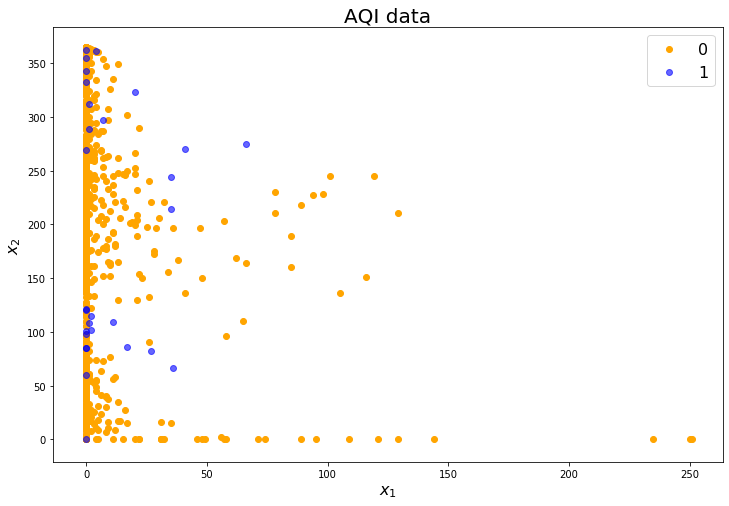

In [347]:
plt.figure(figsize = (12,8))
           
plt.scatter(X[y == 0,0],X[y == 0,1],color="orange",label="0")
plt.scatter(X[y == 1,0],X[y == 1,1],color="blue",label="1", alpha = .6)

plt.legend(fontsize=16)

plt.xlabel("$x_1$",fontsize=16)
plt.ylabel("$x_2$",fontsize=16)
plt.title("AQI data",fontsize = 20)

plt.show()

In [341]:
max_margin.fit(X,y);

C:\Users\plame\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [342]:
#max_margin.named_steps['svc']

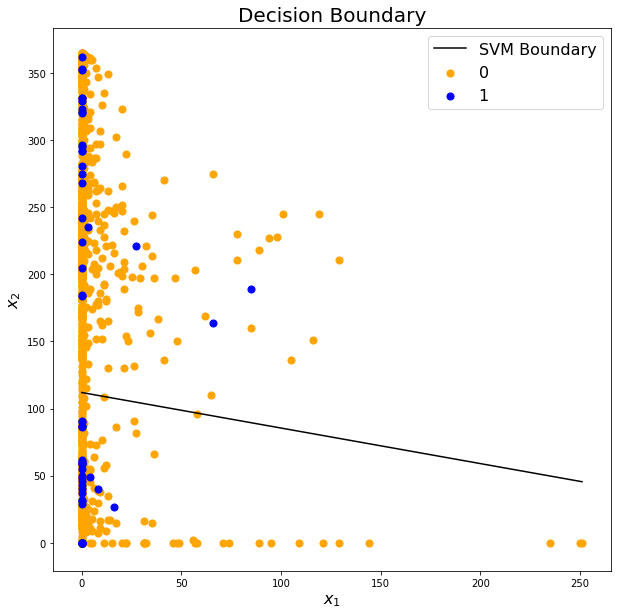

In [343]:
plot_bound(max_margin.named_steps['svc'],X,y,True)

In [344]:
# X=np.zeros([6,6])
# #fig,axes=plt.subplots(6,6)

# for i in range(len(county.columns[10:12])):
#      for j in range(len(county.columns[10:12])):
            
#             name=county.columns[10:12]

#             X=np.array(county[[name[i],name[j]]])
#             y=np.array(county['New York'])
#             max_margin.fit(X,y)
#             plot_bound(max_margin.named_steps['svc'],X,y,True)
            

In [345]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [277]:
max_depth = 4
tree_clf = DecisionTreeClassifier(max_depth = max_depth,random_state = 614)

# Fit the tree
tree_clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=614, splitter='best')

In [278]:
def plot_bound_tree(clf,X,y,pts = False):
    plot_step = 100

    x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
    y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))


    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize = (12,10))
    cs = plt.contourf(xx, yy, Z, colors=['orange','white','blue','white'])

    if pts:
        plt.scatter(X[y == 0,0],X[y == 0,1],color="black",ec="white",label="0",s=50)
        plt.scatter(X[y == 1,0],X[y == 1,1],color="white",label="1", alpha = 1,s=50)

        plt.legend(fontsize=16)

    plt.xlabel("$x_1$",fontsize=16)
    plt.ylabel("$x_2$",fontsize=16)
    plt.title("AQI data set",fontsize = 20)

    plt.show()

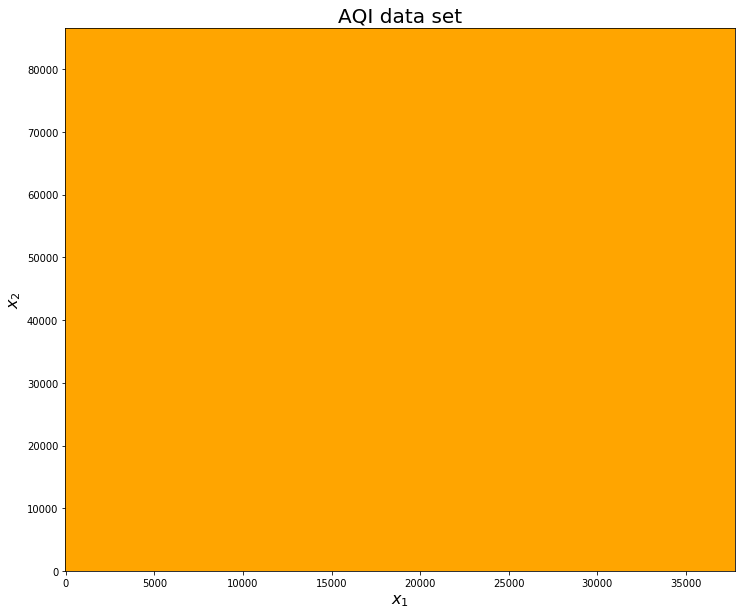

In [279]:
# Plot the boundary
plot_bound_tree(tree_clf,X,y)

In [280]:
from sklearn.ensemble import RandomForestClassifier

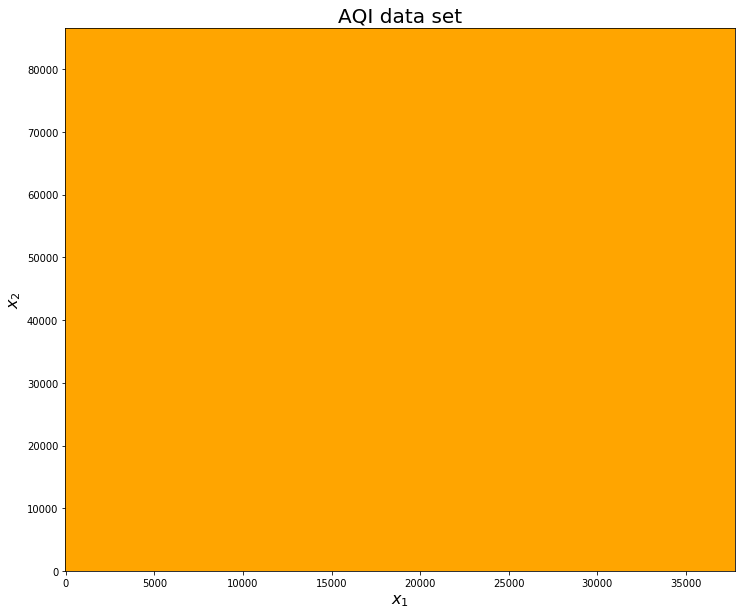

In [281]:
forest_clf = RandomForestClassifier(max_depth = max_depth)

forest_clf.fit(X,y)

plot_bound_tree(forest_clf,X,y)

## List of Data Stations

In [244]:
sites=pd.read_csv('https://raw.githubusercontent.com/yilmazduygu/gretta-grettas/master/aqs_sites.csv')

In [247]:
sites[(sites["State Name"]=="New York") & (sites["City Name"]=='New York')]

,State Code,County Code,Site Number,Latitude,Longitude,Datum,Elevation,Land Use,Location Setting,Site Established Date,...,Owning Agency,Local Site Name,Address,Zip Code,State Name,County Name,City Name,CBSA Name,Tribe Name,Extraction Date
11926,36,5,3,40.831767,-73.903748,WGS84,41.0,RESIDENTIAL,URBAN AND CENTER CITY,1968-01-01,...,New York State Department Of Environmental Con...,NaN,"MORRISANIA HEALTH CENTER,1309 FULTON AV.",NaN,New York,Bronx,New York,"New York-Newark-Jersey City, NY-NJ-PA",NaN,2020-05-19
11927,36,5,6,40.878054,-73.890397,WGS84,43.0,RESIDENTIAL,URBAN AND CENTER CITY,1968-01-01,...,US EPA National Exposure Research Lab,NaN,"BRONX HS OF SCIENCE, 205 ST.&GOULDEN AVE",10468.0,New York,Bronx,New York,"New York-Newark-Jersey City, NY-NJ-PA",NaN,2020-05-19
11928,36,5,9,40.806942,-73.796229,WGS84,3.0,RESIDENTIAL,SUBURBAN,1968-01-01,...,New York State Department Of Environmental Con...,NaN,"FORT SCHUYLER ,USNMC RTC",10465.0,New York,Bronx,New York,"New York-Newark-Jersey City, NY-NJ-PA",NaN,2020-05-19
11929,36,5,12,40.859165,-73.914009,WGS84,46.0,RESIDENTIAL,URBAN AND CENTER CITY,1965-01-01,...,New York State Department Of Environmental Con...,NaN,"NY UNIV. (HGTS CAMPUS),1911 OSBORN PLACE",10453.0,New York,Bronx,New York,"New York-Newark-Jersey City, NY-NJ-PA",NaN,2020-05-19
11930,36,5,22,40.810555,-73.907621,WGS84,9.0,RESIDENTIAL,URBAN AND CENTER CITY,1965-01-01,...,New York State Department Of Environmental Con...,NaN,"SAMUEL GOMPERS HS, 445 SOUTHERN BLVD",10455.0,New York,Bronx,New York,"New York-Newark-Jersey City, NY-NJ-PA",NaN,2020-05-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12467,36,85,109,40.591111,-74.158611,WGS84,0.0,COMMERCIAL,SUBURBAN,1994-10-01,...,New York State Department Of Environmental Con...,PS 69 FRESHKILLS NETWORK,PS 69 144 KEATING PLACE,NaN,New York,Richmond,New York,"New York-Newark-Jersey City, NY-NJ-PA",NaN,2020-05-19
12468,36,85,111,40.580270,-74.198320,WGS84,3.0,COMMERCIAL,SUBURBAN,1999-07-05,...,New York State Department Of Environmental Con...,FRESHKILLS WEST,FRESHKILLS WEST 310 West Service Road,10314.0,New York,Richmond,New York,"New York-Newark-Jersey City, NY-NJ-PA",NaN,2020-05-19
12469,36,85,114,40.631370,-74.157320,WGS84,16.0,COMMERCIAL,URBAN AND CENTER CITY,2001-01-01,...,New York State Department Of Environmental Con...,PS 44,PS 44 80 MAPLE PARKWAY,10303.0,New York,Richmond,New York,"New York-Newark-Jersey City, NY-NJ-PA",NaN,2020-05-19
12470,36,85,131,40.588060,-74.168820,WGS84,5.0,INDUSTRIAL,URBAN AND CENTER CITY,2001-12-01,...,New York State Department Of Environmental Con...,FRESHKILLS EAST,2470 RICHMOND AVENUE,10314.0,New York,Richmond,New York,"New York-Newark-Jersey City, NY-NJ-PA",NaN,2020-05-19


In [358]:
from datetime import datetime

In [364]:
datetime(2012,10,20)

datetime.datetime(2012, 10, 20, 0, 0)

In [366]:
l=[(2012,10,20),(2015,10,20)]

TypeError: an integer is required (got type tuple)